In [1]:
from pydub import AudioSegment
import numpy as np
import librosa
from librosa.display import waveplot, specshow
import IPython.display as ipd
import matplotlib.pyplot as plt
import pyworld as pw
import soundfile as sf
import pyworld

In [29]:
%%time
filePath = 'input_path/sdlf.wav'
x, fs = librosa.load(filePath, sr=22050)
x = x.astype('float64')
print(fs)

22050
Wall time: 58.9 ms


In [30]:
%%time
x, fs = sf.read(filePath)
print(fs)

16000
Wall time: 1.97 ms


method 1:

In [28]:
f0, t = pw.dio(x, fs)    # raw pitch extractor
f0 = pw.stonemask(x, f0, t, fs)  # pitch refinement
sp = pw.cheaptrick(x, f0, t, fs)  # extract smoothed spectrogram
ap = pw.d4c(x, f0, t, fs)         # extract aperiodicity
y = pw.synthesize(f0, sp, ap, fs)

In [29]:
sp.shape

(1785, 513)

method 2:

f0_floor : float, None  
    Lower F0 limit in Hz. Not used in case `fft_size` is specified.  
    Default: 71.0  
fft_size : int, None  
    FFT size to be used. When `None` (default) is used, the FFT size is computed  
    automatically as a function of the given input sample rate and F0 floor.  
    When `fft_size` is specified, the given `f0_floor` parameter is ignored.  
    Default: None

In [35]:
fft_size = 1024
dim = 36
wav = x
wav = wav.astype(np.float64)
f0, t = pyworld.harvest(wav, fs) # 这个似乎比dio更好 
sp = pyworld.cheaptrick(wav, f0, t, fs, fft_size=fft_size)
ap = pyworld.d4c(wav, f0, t, fs, fft_size=fft_size)
print(sp.shape)
print(ap.shape)
coded_sp = pyworld.code_spectral_envelope(sp, fs, dim)
print(coded_sp.shape)
new_sp = pyworld.decode_spectral_envelope(coded_sp, fs, fft_size)

y = pw.synthesize(f0, new_sp, ap, fs)

(716, 513)
(716, 513)
(716, 36)


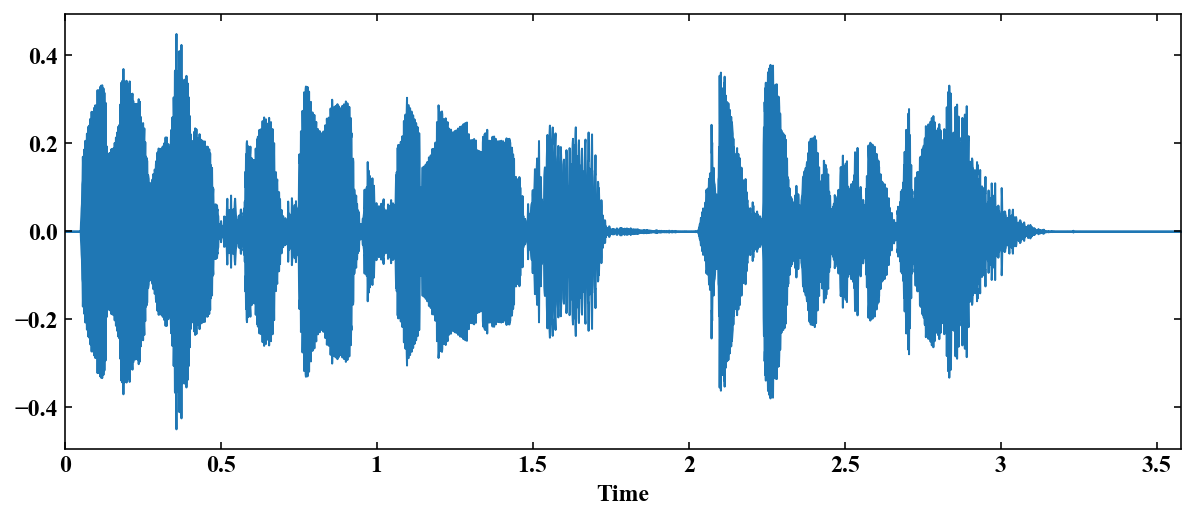

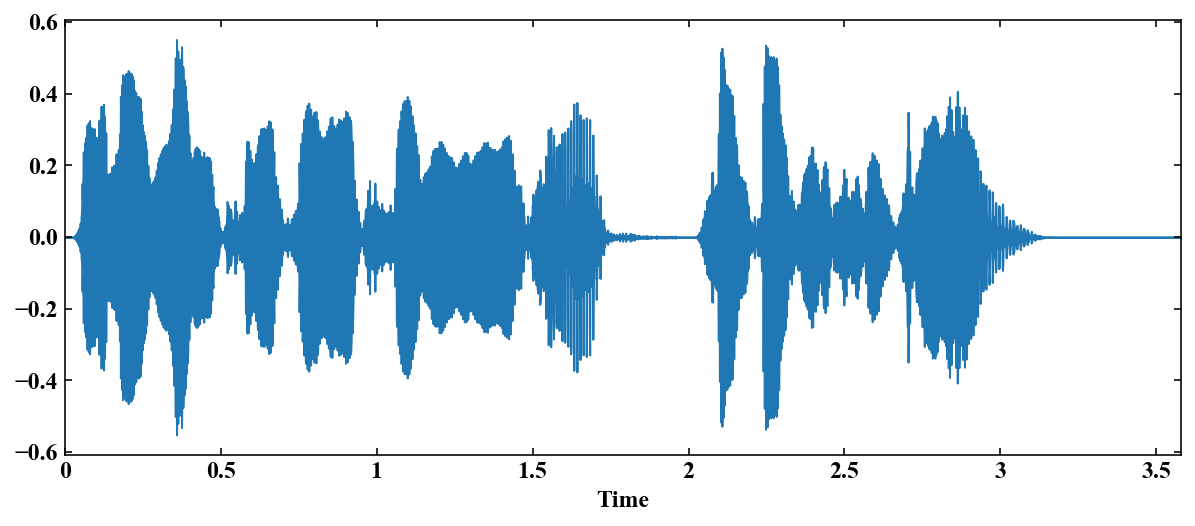

In [32]:
# comparison
plt.figure(figsize=(10,4))
waveplot(x, fs); plt.show()
plt.figure(figsize=(10,4))
waveplot(y, fs); plt.show()

In [33]:
ipd.Audio(x, rate=fs)

In [34]:
ipd.Audio(y, rate=fs)